# 🐊 Run the GATOR Prediction Algorithm on new images

**Download the [executable notebook](https://github.com/nirmalLab/gatorpy/blob/main/docs/Tutorials/notebooks/ApplyModel.ipynb) and [trained models](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/QDZ6XO).**  
For the purpose of this tutorial, replace the `gatorModel` folder within the exemplar data with the newly downloaded `gatorModel` directory. 
  
Make sure you have completed `BuildModels` Tutorial before you try to execute this Jupyter Notebook!
  
Please keep in mind that the sample data is used for demonstration purposes only and has been simplified and reduced in size. It is solely intended for educational purposes on how to execute `Gator` and will not yeild any meaningful results.


**Running the Gator Prediction Algorithm involves the following steps:**
- Run the `gatorPredict` function on a new image. It will produce an image with probability masks
- Run the `generateGatorScore` function on the probability masks to generate the `gatorScores`
- Run the `gatorObject` to create an anndata object with the `gatorScores` and pre-computed `single-cell table`
- Lastly, run `gator`  on the gatorObject
  
**Note: To make things easy, all of the above steps can be run with a single command `gatorPipeline`.**  
Typically, in production settings, `gatorPipeline` would be utilized, whereas step-by-step analysis would be employed for troubleshooting, model validation, and similar tasks that necessitate greater granularity or control.

<hr>

## Single command execution of the entire Gator Prediction Algorithm using the `gatorPipeline` function

In [2]:
# import packages in jupyter notebook (not needed for command line interface users)
import gatorpy as ga

In [4]:
# Path to all the files that are necessary files for running the Gator Prediction Algorithm (broken down based on sub functions)
projectDir = '/Users/aj/Desktop/gatorExampleData'

# gatorPredict related paths
imagePath = projectDir + '/image/exampleImage.tif'
markerChannelMapPath = projectDir + '/markers.csv'
gatorModelPath = projectDir + '/manuscriptModels/'

# Generate generateGatorScore related paths
segmentationPath = projectDir + '/segmentation/exampleSegmentationMask.tif'

# gatorObject related paths
spatialTablePath = projectDir + '/quantification/exampleSpatialTable.csv'


In [8]:
# Run the pipeline (For function specific parameters, check the documentation)
ga.gatorPipeline(   
                    # parameters for gatorPredict function
                    imagePath=imagePath,
                    gatorModelPath=gatorModelPath,
                    markerChannelMapPath=markerChannelMapPath,

                    # parameters for generateGatorScore function
                    segmentationMaskPath=segmentationPath,

                    # parameters for gatorObject function
                    spatialTablePath=spatialTablePath,

                    # parameters to run gator function
                    # ..

                    # common parameters
                    verbose=False,
                    projectDir=projectDir)


loading data
Instructions for updating:
Colocations handled automatically by placer.


c:\Users\aj\.conda\envs\gator\lib\site-packages\gatorpy\UNet.py:137: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  bn = tf.nn.leaky_relu(tf.layers.batch_normalization(c00+shortcut, training=UNet2D.tfTraining))
c:\Users\aj\.conda\envs\gator\lib\site-packages\gatorpy\UNet.py:159: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  lbn = tf.nn.leaky_relu(tf.layers.batch_normalization(
c:\Users\aj\.conda\envs\gator\lib\site-packages\gatorpy\UNet.py:162: UserWarning: `tf.layers.

loading data
loading data
INFO:tensorflow:Restoring parameters from C:\Users\aj\Documents\gatorExampleData\manuscriptModels\ECAD\model.ckpt
Model restored.
Inference...
loading data
loading data
loading data
INFO:tensorflow:Restoring parameters from C:\Users\aj\Documents\gatorExampleData\manuscriptModels\CD3D\model.ckpt
Model restored.
Inference...


c:\Users\aj\.conda\envs\gator\lib\site-packages\gatorpy\gator.py:390: RuntimeWarning: invalid value encountered in divide
  below_midpoint = (below_midpoint - min_below) / range_below


**Same function if the user wants to run it via Command Line Interface**
```
python gatorPipeline.py \
        --imagePath /Users/aj/Desktop/gatorExampleData/image/exampleImage.tif \
        --gatorModelPath /Users/aj/Desktop/gatorExampleData/manuscriptModels/ \
        --markerChannelMapPath /Users/aj/Desktop/gatorExampleData/markers.csv \
        --segmentationMaskPath /Users/aj/Desktop/gatorExampleData/segmentation/exampleSegmentationMask.tif \
        --spatialTablePath /Users/aj/Desktop/gatorExampleData/quantification/exampleSpatialTable.csv \
        --projectDir /Users/aj/Desktop/gatorExampleData \
        --verbose True
```

Head over to `GATOR/gatorOutput` to view results

## Visualize the results

Let us visualize the marker postivity of three markers using a helper plotting function provided within Gator.

/opt/anaconda3/envs/gator/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


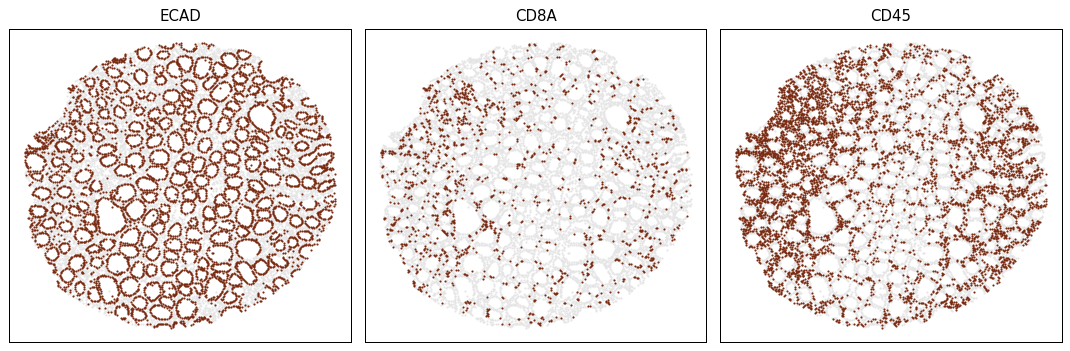

In [6]:
gatorObject = projectDir + '/GATOR/gatorOutput/exampleImage_gatorPredict.ome.h5ad'

# Plot image to console
ga.scatterPlot(gatorObject,
            markers=['ECAD', 'CD8A', 'CD45'],
            poscellsColor='#78290f',
            negcellsColor='#e5e5e5',
            s=0.5,
            ncols=3,
            dpi=90,
            figsize=(4, 4),
            outputDir=projectDir + '/GATOR',
            outputFileName='gatorplot.png')


<hr>

## Step by step execution of the Gator Prediction Algorithm

In [ ]:
# import packages in jupyter notebook (not needed for command line interface users)
import gatorpy as ga

In [4]:
# Path to all the files that are necessary files for running gatorPredict
projectDir = '/Users/aj/Desktop/gatorExampleData'

# gatorPredict related paths
imagePath = projectDir + '/image/exampleImage.tif'
markerChannelMapPath = projectDir + '/markers.csv'
gatorModelPath = projectDir + '/manuscriptModels/'


## Step-1: Apply the generated Models on the Image of interest (Pixel Level)

The function `gatorPredict` is employed to make predictions about the expression of a specified marker on cells in new images using the models generated by `gatorTrain`. This calculation is done at the pixel level, resulting in an output image where the number of channels corresponds to the number of models applied to the input image. The parameter `markerChannelMapPath` is used to associate the image channel number with the relevant model to be applied.

In [9]:
ga.gatorPredict( imagePath=imagePath,
                 gatorModelPath=gatorModelPath,
                 projectDir=projectDir,
                 markerChannelMapPath=markerChannelMapPath, 
                 markerColumnName='marker', 
                 channelColumnName='channel', 
                 modelColumnName='gatormodel')

Running gator model ECAD on channel 2 corresponding to marker ECAD
loading data


c:\Users\aj\.conda\envs\gator\lib\site-packages\gatorpy\UNet.py:137: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  bn = tf.nn.leaky_relu(tf.layers.batch_normalization(c00+shortcut, training=UNet2D.tfTraining))
c:\Users\aj\.conda\envs\gator\lib\site-packages\gatorpy\UNet.py:159: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  lbn = tf.nn.leaky_relu(tf.layers.batch_normalization(
c:\Users\aj\.conda\envs\gator\lib\site-packages\gatorpy\UNet.py:162: UserWarning: `tf.layers.

loading data
loading data
INFO:tensorflow:Restoring parameters from C:\Users\aj\Documents\gatorExampleData\manuscriptModels\ECAD\model.ckpt
Model restored.
Inference...
Running gator model CD3D on channel 5 corresponding to marker CD3D
loading data
loading data
loading data
INFO:tensorflow:Restoring parameters from C:\Users\aj\Documents\gatorExampleData\manuscriptModels\CD3D\model.ckpt
Model restored.
Inference...


**Same function if the user wants to run it via Command Line Interface**
```
python gatorPredict.py --imagePath /Users/aj/Desktop/gatorExampleData/image/exampleImage.tif \
                        --gatorModelPath /Users/aj/Desktop/gatorExampleData/manuscriptModels/ \
                        --projectDir /Users/aj/Desktop/gatorExampleData \
                        --markerChannelMapPath /Users/aj/Desktop/gatorExampleData/markers.csv
```

## Step-2: Calculate the gatorScore (Single-cell Level)

After calculating pixel-level probability scores, the next step is to aggregate them to the single-cell level. This can be done by computing the mean or median probability scores using pre-computed segmentation masks. The marker names, if available, should already be included in the probabilityMask image. If the marker names are lost due to file manipulation, the user can provide them through the markerNames parameter.

In [10]:
# Path to all the files that are necessary files for running generateGatorScore
segmentationPath = projectDir + '/segmentation/exampleSegmentationMask.tif'
probabilityMaskPath = projectDir + '/GATOR/gatorPredict/exampleImage_gatorPredict.ome.tif'


In [11]:
ga.generateGatorScore(probabilityMaskPath=probabilityMaskPath,
                      segmentationMaskPath=segmentationPath,
                      feature='median',
                      projectDir=projectDir)


Quantifying the probability masks
gatorScore is ready, head over toC:\Users\aj\Documents\gatorExampleData/GATOR/gatorScore" to view results


**Same function if the user wants to run it via Command Line Interface**
```
python generateGatorScore.py --probabilityMaskPath /Users/aj/Desktop/gatorExampleData/GATOR/gatorPredict/exampleImage_gatorPredict.ome.tif \
                            --segmentationMask /Users/aj/Desktop/gatorExampleData/segmentation/exampleSegmentationMask.tif \
                            --projectDir /Users/aj/Desktop/gatorExampleData/
```

If you head over to `GATOR/gatorScore/`, you will find the `.csv` file with the gatorScores for every cell.

## Step-3: Create a Gator object

We'll use the anndata framework to create a gator object to store all information in one file, making it easier to keep track of intermediate files generated in subsequent steps.  This helps streamline the data analysis process and reduces the risk of losing or misplacing information.

In [12]:
# Path to all the files that are necessary files for running gatorObject function
segmentationPath = projectDir + '/segmentation/exampleSegmentationMask.tif'
gatorScorePath = projectDir + '/GATOR/gatorScore/exampleImage_gatorPredict.ome.csv'


In [13]:
# please note that there are a number of defaults in the below function that assumes certain structure within the spatialTable.
# Please confirm it is similar with user data or modifiy the parameters accordingly
# check out the documentation for further details
adata = ga.gatorObject (spatialTablePath=spatialTablePath,
                        gatorScorePath=gatorScorePath,
                        CellId='CellID',
                        uniqueCellId=True,
                        split='X_centroid',
                        removeDNA=True,
                        remove_string_from_name=None,
                        log=True,
                        dropMarkers=None,
                        projectDir=projectDir)


Loading exampleSpatialTable.csv
Gator Object has been created, head over toC:\Users\aj\Documents\gatorExampleData/GATOR/gatorObject" to view results


**Same function if the user wants to run it via Command Line Interface**
```
python gatorObject.py --spatialTablePath /Users/aj/Desktop/gatorExampleData/quantification/exampleSpatialTable.csv \
                        --gatorScorePath /Users/aj/Desktop/gatorExampleData//GATOR/gatorScore/exampleImage_gatorPredict.ome.csv \
                        --projectDir /Users/aj/Desktop/gatorExampleData
```

If you had provided `projectDir` the object would be stored in `GATOR/gatorObject/`, else, the object will be returned to memory

## Step-4: Run the final Gator Algorithm

The `gator` algorithm is ready to run after pre-processing. To get optimal results, consider adjusting the following parameters:
  
1. The `minAbundance` parameter determines the minimum percentage of a marker's abundance to consider it a failure.
2. It is suggested to drop background markers with the `dropMarkers` option as they can interfere with classifiers.
3. `RobustScale`: Scaling the data before training the classifier model has been shown to improve results. However, in our experience a simple log transformation was found to be work best. 

In [14]:
# Path to all the files that are necessary files for running gator function
gatorObject = projectDir + '/GATOR/gatorObject/exampleImage_gatorPredict.ome.h5ad'


In [15]:
adata = ga.gator ( gatorObject=gatorObject,
                    gatorScore='gatorScore',
                    minAbundance=0.005,
                    percentiles=[1, 20, 80, 99],
                    dropMarkers = None,
                    RobustScale=False,
                    log=True,
                    x_coordinate='X_centroid',
                    y_coordinate='Y_centroid',
                    imageid='imageid',
                    random_state=0,
                    rescaleMethod='sigmoid',
                    label='gatorOutput',
                    verbose=False,
                   projectDir=projectDir)


**Same function if the user wants to run it via Command Line Interface**
```
python gator.py --gatorObject /Users/aj/Desktop/gatorExampleData/GATOR/gatorObject/exampleImage_gatorPredict.ome.h5ad \
                --projectDir /Users/aj/Desktop/gatorExampleData
```

If `projectDir` is provided, modified anndata object with results (stored in `adata.uns['gatorOutput']`) will be saved in `GATOR/gatorOutput/`. The gator-scaled data (stored in `adata.X`) considers cells above 0.5 as positive and below 0.5 as negative for the marker.

## Step-5: Merge multiple Gator objects (optional)

Use `mergeGatorObject` to combine multiple gatorObjects into a dataset for analysis when multiple images need to be analyzed.
  
Note that merging gatorObjects requires merging multiple sections, not simple concatenation. Use parameters to specify which parts of the gatorObjects to merge.

In [16]:
# set the working directory & set paths to the example data
gatorObjects = [projectDir + '/GATOR/gatorOutput/exampleImage_gatorPredict.ome.h5ad',
                projectDir + '/GATOR/gatorOutput/exampleImage_gatorPredict.ome.h5ad']


In [17]:
# For this tutorial, supply the same gatorObject twice for merging, but multiple gatorObjects can be merged in ideal conditions.
adata = ga.mergeGatorObject ( gatorObjects=gatorObjects,
                              fileName='mergedGatorObject',
                              layers=['preProcessed'],
                              uns= ['gatorOutput','gatorScore'],
                              projectDir=projectDir)


Extracting data
Extracting data from: exampleSpatialTable
Extracting data from: exampleSpatialTable
Given gatorObjects have been merged, head over to "C:\Users\aj\Documents\gatorExampleData/GATOR/mergedGatorObject" to view results


c:\Users\aj\.conda\envs\gator\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


**Same function if the user wants to run it via Command Line Interface**
```
python mergeGatorObject.py --gatorObjects /Users/aj/Desktop/gatorExampleData/GATOR/gatorOutput/exampleImage_gatorPredict.ome.h5ad /Users/aj/Desktop/gatorExampleData/GATOR/gatorOutput/exampleImage_gatorPredict.ome.h5ad --projectDir /Users/aj/Desktop/gatorExampleData
```

If `projectDir` is provided, modified anndata object with results will be saved in `GATOR/mergedGatorObject/`.

In [ ]:
# this tutorial ends here. Move to the Phenotyping cells Tutorial